In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
print(df.shape)
df = df[df.Class != 2]
df.shape

(1262, 11619)


(949, 11619)

In [6]:
features = df.drop('Class',axis=1)
labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
labels_df = pd.read_csv(labels_dr, sep = ",", dtype='unicode')

In [7]:
labels = labels_df.iloc[:949,:2]

In [8]:
pca = PCA(n_components = 225).fit(features)
principalComponents = pca.fit_transform(features)
columns = ['Pc' + str(i) for i in range(1,226)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [20]:
principalDf.shape

(949, 225)

In [68]:
Batch_size = 32
def build_model(TIME_PERIODS):
    input_shape=(TIME_PERIODS,)
    model = Sequential()
    model.add(keras.Input(shape=(TIME_PERIODS,1)))
    model.add(LSTM(22, input_shape=(principalDf.sha,1)))
    model.add(LSTM(100))
    model.add(Dense(2))
    model.add(Activation('sigmoid'))
    return model



In [55]:
x_train_225, x_test_225, y_train_225, y_test_225 = train_test_split(principalDf, labels, test_size= 0.2, random_state=42)
x_train_225, x_val_225, y_train_225, y_val_225 = train_test_split(x_train_225, y_train_225, test_size=0.25, random_state= 42)

In [56]:
y_train_225 = y_train_225.astype(int)
y_test_225 = y_test_225.astype(int)
y_val_225 = y_val_225.astype(int)

In [69]:
ckpt = keras.callbacks.ModelCheckpoint(
        filepath='C:/Users/norma/Desktop/BITIRME/Models/LSTM/best_model.{epoch:02d}-{val_accuracy:.4f}.h5',
        monitor='val_accuracy', save_best_only=True,verbose=1)

tensorboard = TensorBoard(
  log_dir='.\logs',
  histogram_freq=1,
  write_images=True
)

callbacks = [EarlyStopping(monitor='val_accuracy', patience=30, mode='min', min_delta=0.0001),
         ckpt, tensorboard]

model_225 = build_model(principalDf.shape[1])
opt = tf.keras.optimizers.Adam(0.0001)
model_225.compile(loss='categorical_crossentropy',
            optimizer=opt, metrics=['accuracy'])

ValueError: Input 0 of layer "lstm_32" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 22)

In [65]:
history_225 = model_225.fit(
      x= x_train_225,
      y = y_train_225,
      steps_per_epoch=len(principalDf)//Batch_size,
      validation_data=(x_val_225, y_val_225),
      epochs=50,
      callbacks=[callbacks]
      )

y_pred_225 = model_225.predict(x_test_225)
y_pred_225 = np.argmax(y_pred_225, axis=1)

class_d = 'C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv'
class_df = pd.read_csv(class_d, sep = ';', decimal = ',')
class_df = class_df[class_df.Class != 2]

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(class_df[['Class']]).toarray())
encoder_df.columns = ['AD','CTL']

y_test_n225_ = encoder.inverse_transform(y_test_225).ravel()

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4903
Epoch 1: val_accuracy improved from -inf to 0.48947, saving model to C:/Users/norma/Desktop/BITIRME/Models/LSTM\best_model.01-0.4895.h5
29/29 [==============================] - 5s 123ms/step - loss: 0.6932 - accuracy: 0.4903 - val_loss: 0.6932 - val_accuracy: 0.4895
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5149
Epoch 2: val_accuracy did not improve from 0.48947
29/29 [==============================] - 3s 108ms/step - loss: 0.6931 - accuracy: 0.5149 - val_loss: 0.6932 - val_accuracy: 0.4789
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5202
Epoch 3: val_accuracy did not improve from 0.48947
29/29 [==============================] - 3s 110ms/step - loss: 0.6931 - accuracy: 0.5202 - val_loss: 0.6932 - val_accuracy: 0.4789
Epoch 4/50
29/29 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 

29/29 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.5202
Epoch 30: val_accuracy did not improve from 0.48947
29/29 [==============================] - 3s 112ms/step - loss: 0.6922 - accuracy: 0.5202 - val_loss: 0.6955 - val_accuracy: 0.4789
Epoch 31/50
29/29 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.5202
Epoch 31: val_accuracy did not improve from 0.48947
29/29 [==============================] - 3s 111ms/step - loss: 0.6922 - accuracy: 0.5202 - val_loss: 0.6959 - val_accuracy: 0.4789
Epoch 32/50
29/29 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5202
Epoch 32: val_accuracy did not improve from 0.48947
29/29 [==============================] - 3s 112ms/step - loss: 0.6921 - accuracy: 0.5202 - val_loss: 0.6957 - val_accuracy: 0.4789


In [18]:
print(accuracy_score(y_test_n225_,y_pred_225))

0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        95
           0       0.50      1.00      0.67        95

    accuracy                           0.50       190
   macro avg       0.25      0.50      0.33       190
weighted avg       0.25      0.50      0.33       190



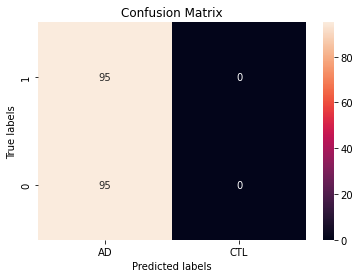

In [19]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_n225_,y_pred_225,labels=[1,0])
print('Classification report : \n',matrix)

labels_ = [1,0]
ax= plt.subplot()

# confusion matrix
matrix = confusion_matrix(
    y_test_n225_, y_pred_225)

sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels_);